# Autocorrelation analysis on pulses

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import dedisperse_dynspec as dd
import copy

DM = 275

In [45]:
def autocorrelate(lightcurve):
    ffted = np.fft.rfft(lightcurve)
    fft_autocorred = ffted * np.conjugate(ffted)
    autocorred = np.fft.irfft(fft_autocorred, n=lightcurve.shape[0])
    return autocorred[:len(ffted)]

In [46]:
def plot_autocorrelate(autocorred, dt):
    lags = np.arange(len(autocorred))*dt
    plt.plot(lags[1:], autocorred[1:])
    plt.xlabel("Lag (s)")
    plt.ylabel("Correlation coefficient (a.u.)")

## 1340639536

Make the dynamic spectrum and lightcurve

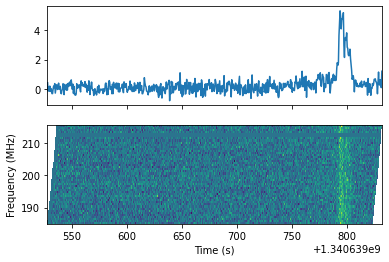

In [36]:
yaml_file = "1340639536.yaml"
with open(yaml_file, 'r') as yaml:
    params = dd.parse_yaml(yaml)
    dynspec = dd.Dynspec(**params)

dynspec.set_freq_ref('high')
dynspec.add_dm_padding(DM, fill_value=0.0)

dynspec.dedisperse(DM)
dynspec.fscrunch()

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
dynspec.plot_lightcurve(axs[0])
dynspec.plot(axs[1])

Truncate lightcurve to get rid of lightcurve that is noise dominated

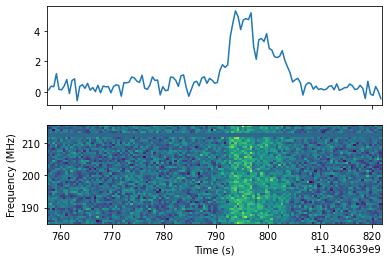

In [38]:
dynspec_pruned = copy.deepcopy(dynspec)
dynspec_pruned.prune_time(230, before=True, after=False)
dynspec_pruned.prune_time(10, before=False, after=True)

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
dynspec_pruned.plot(axs[1])
dynspec_pruned.plot_lightcurve(axs[0])

Autocorrelate the lightcurve

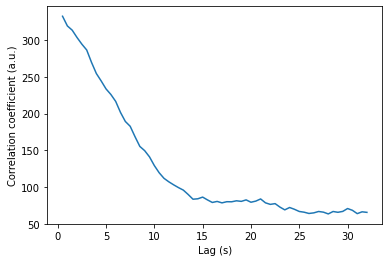

In [48]:
autocorred = autocorrelate(dynspec_pruned.fscrunched)
plot_autocorrelate(autocorred, dynspec_pruned.dt)